In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definição e explicação do modelo

## Modelo:
- Deseja-se **estimar o preço do veículo** com base nas variáveis do conjunto de dados.

#### É importante saber quais variáveis têm maior impacto sobre o preço do veículo.
Portanto, será, na análise preliminar, verificada a variação do preço com base em diversas variáveis.
#### Ainda, é possível ver o quanto a variação de cada variável impacta no preço final do automóvel.

# Leitura dos dados

In [2]:
df = pd.read_csv('car_price_regression/focus.csv')
df

,model,year,price,transmission,mileage,fuelType,engineSize
0,Focus,2016,8000,Manual,38852,Petrol,1.0
1,Focus,2019,13400,Manual,11952,Petrol,1.0
2,Focus,2019,14600,Manual,22142,Petrol,1.5
3,Focus,2016,9450,Manual,14549,Diesel,1.6
4,Focus,2015,9999,Manual,7010,Diesel,1.6
...,...,...,...,...,...,...,...
5449,Focus,2019,18745,Manual,7855,Diesel,2.0
5450,Focus,2019,16350,Manual,13891,Petrol,1.0
5451,Focus,2019,16850,Manual,13452,Petrol,1.0
5452,Focus,2019,17310,Automatic,13376,Petrol,1.0


# Análise preliminar

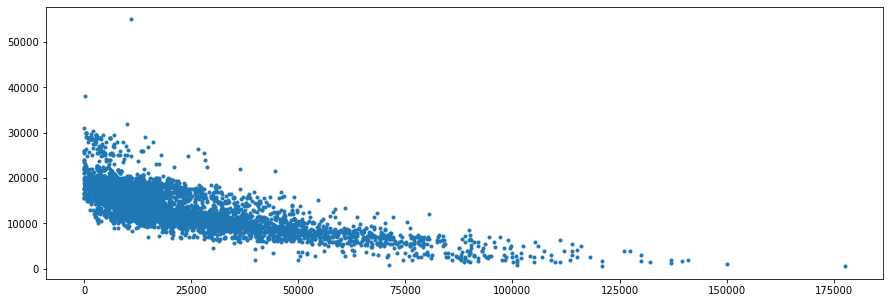

In [3]:
plt.figure(figsize=(15, 5))
plt.plot(df.mileage,df.price, '.')

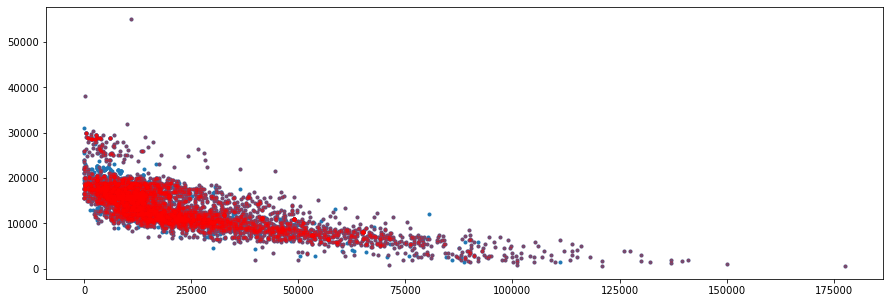

In [4]:
plt.figure(figsize=(15, 5))
plt.plot(df.mileage,df.price, '.')
plt.plot(df.loc[df.transmission=='Manual'].mileage,df.loc[df.transmission=='Manual'].price, 'r.', alpha=.3)

### Carros manuais têm um custo de depreciação similar aos automáticos. Isso significa que carros manuais não depreciam mais rápido que carros automáticos.

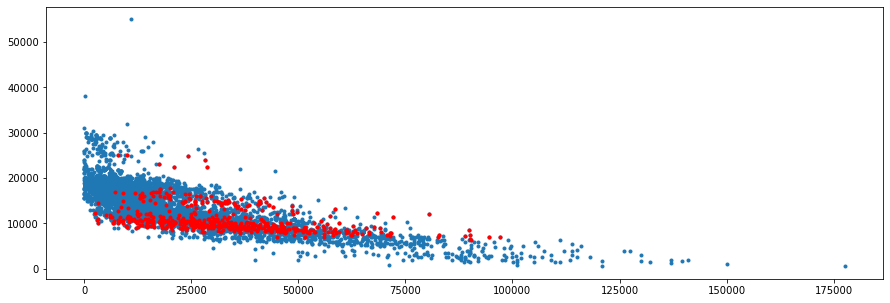

In [5]:
plt.figure(figsize=(15, 5))
plt.plot(df.mileage,df.price, '.')
plt.plot(df.loc[df.year==2016].mileage,df.loc[df.year==2016].price, 'r.')

### Todos os veículos mais 'antigos', independentemente da milhagem, sofrem com a depreciação de preço.

# Objetivo: Entender como essas variáveis influenciam no preço do veículo

In [6]:
df.head()

,model,year,price,transmission,mileage,fuelType,engineSize
0,Focus,2016,8000,Manual,38852,Petrol,1.0
1,Focus,2019,13400,Manual,11952,Petrol,1.0
2,Focus,2019,14600,Manual,22142,Petrol,1.5
3,Focus,2016,9450,Manual,14549,Diesel,1.6
4,Focus,2015,9999,Manual,7010,Diesel,1.6


In [7]:
df.model.value_counts(dropna=False)

 Focus    5454
Name: model, dtype: int64

In [8]:
df.shape

(5454, 7)

### Já que esse dataset é exclusivo para carros do modelo 'Focus', essa coluna pode ser excluída.

In [9]:
df = df.drop('model', axis=1)
df

,year,price,transmission,mileage,fuelType,engineSize
0,2016,8000,Manual,38852,Petrol,1.0
1,2019,13400,Manual,11952,Petrol,1.0
2,2019,14600,Manual,22142,Petrol,1.5
3,2016,9450,Manual,14549,Diesel,1.6
4,2015,9999,Manual,7010,Diesel,1.6
...,...,...,...,...,...,...
5449,2019,18745,Manual,7855,Diesel,2.0
5450,2019,16350,Manual,13891,Petrol,1.0
5451,2019,16850,Manual,13452,Petrol,1.0
5452,2019,17310,Automatic,13376,Petrol,1.0


# Dataprep

## Visto que temos variáveis categóricas não ordinais, precisamos usar um One Hot encoder.

In [10]:
df.dtypes

year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
engineSize      float64
dtype: object

In [11]:
df_onehot = pd.get_dummies(df, drop_first=True)
df_onehot

,year,price,mileage,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Petrol
0,2016,8000,38852,1.0,1,0,1
1,2019,13400,11952,1.0,1,0,1
2,2019,14600,22142,1.5,1,0,1
3,2016,9450,14549,1.6,1,0,0
4,2015,9999,7010,1.6,1,0,0
...,...,...,...,...,...,...,...
5449,2019,18745,7855,2.0,1,0,0
5450,2019,16350,13891,1.0,1,0,1
5451,2019,16850,13452,1.0,1,0,1
5452,2019,17310,13376,1.0,0,0,1


# Modelagem de dados

In [12]:
X = df_onehot.drop('price', axis=1)
y = df_onehot.price
X

,year,mileage,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Petrol
0,2016,38852,1.0,1,0,1
1,2019,11952,1.0,1,0,1
2,2019,22142,1.5,1,0,1
3,2016,14549,1.6,1,0,0
4,2015,7010,1.6,1,0,0
...,...,...,...,...,...,...
5449,2019,7855,2.0,1,0,0
5450,2019,13891,1.0,1,0,1
5451,2019,13452,1.0,1,0,1
5452,2019,13376,1.0,0,0,1


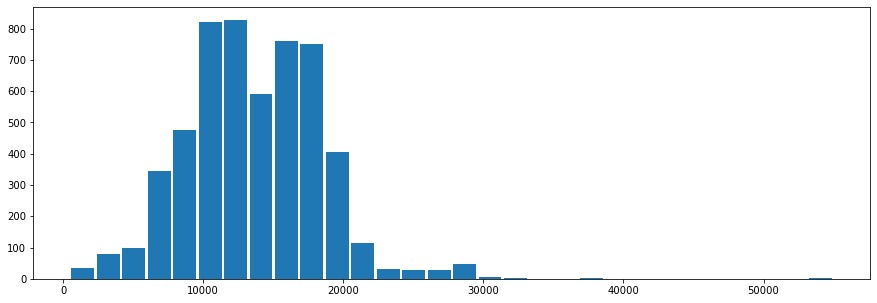

In [13]:
plt.figure(figsize=(15, 5))
plt.hist(y, bins=30, rwidth=.9);

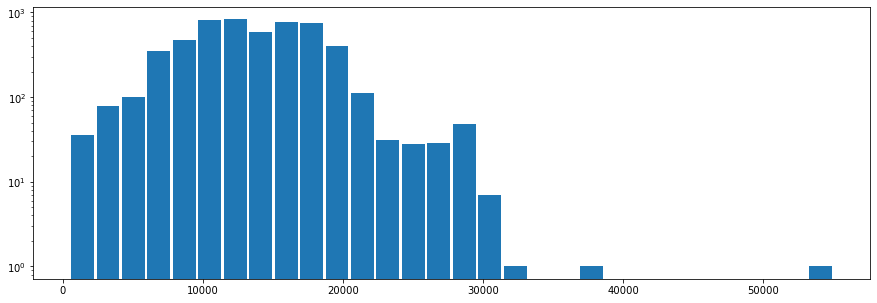

In [14]:
plt.figure(figsize=(15, 5))
plt.hist(y, bins=30, rwidth=.9, log=True);

### Com exceção de alguns outliers (pessoas que compraram os carros por um preço maior), a maioria dos veículos foi vendida por preços entre 10.000 e 20.000 dólares.

# Treinando o modelo

In [15]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=.3, random_state=2021)

In [16]:
X_tr.shape, X_ts.shape

((3817, 6), (1637, 6))

# Normalização

In [17]:
from sklearn.preprocessing import StandardScaler

X_tr_s = X_tr.copy()
X_ts_s = X_ts.copy()

cols_to_scale= [
    'year',
    'mileage',
    'engineSize'
]

scalers = {}
for col in cols_to_scale:
    scalers[col] = StandardScaler()
    scalers[col].fit(X_tr_s[[col]])
    X_tr_s.loc[:, col] = scalers[col].transform(X_tr_s[[col]])
    X_ts_s.loc[:, col] = scalers[col].transform(X_ts_s[[col]])

In [18]:
X_tr_s

,year,mileage,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Petrol
2285,-0.064717,-0.409304,-0.902867,0,1,1
4758,0.862199,-0.496792,-0.902867,1,0,1
3386,-0.528175,-0.362401,1.598035,0,1,0
2843,0.398741,-0.510644,1.598035,1,0,1
5307,0.862199,-0.675315,-0.902867,1,0,1
...,...,...,...,...,...,...
3934,-0.991633,0.309844,0.597674,1,0,0
2669,0.398741,-0.726252,-0.902867,1,0,1
1152,-0.991633,1.983871,0.597674,1,0,0
3413,-0.064717,0.044173,0.347584,1,0,0


# Ajustando o modelo

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(
    fit_intercept=True,
    normalize=False,
    n_jobs=-1
)

lr.fit(X_tr_s, y_tr)

LinearRegression(n_jobs=-1)

In [20]:
y_pred = lr.predict(X_ts_s)
y_pred

array([10638.45381089, 15812.54711409, 11667.16266736, ...,
       18028.40601446, 16074.02397388, 10217.85832145])

In [21]:
X_ts.head()

,year,mileage,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Petrol
4237,2017,43839,1.0,1,0,1
442,2019,13699,1.5,1,0,0
4683,2016,17507,1.5,1,0,0
4944,2019,6108,2.3,1,0,1
3350,2015,13234,1.6,1,0,0


# Validando a regressão

In [22]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_ts, y_pred))

1840.2644674413048

In [23]:
from sklearn.metrics import mean_absolute_error

np.sqrt(mean_absolute_error(y_ts, y_pred))

36.57480306808973

### A diferença entre o MSE e MAE foi causada, provavelmente, por valores outliers. 
- O MSE dá maior importância para outliers.
### Também é interessante verificar se nosso modelo é enviesado (se os erros são randômicos ou se os valores previstos são, geralmente, maiores ou menores que os valores reais).

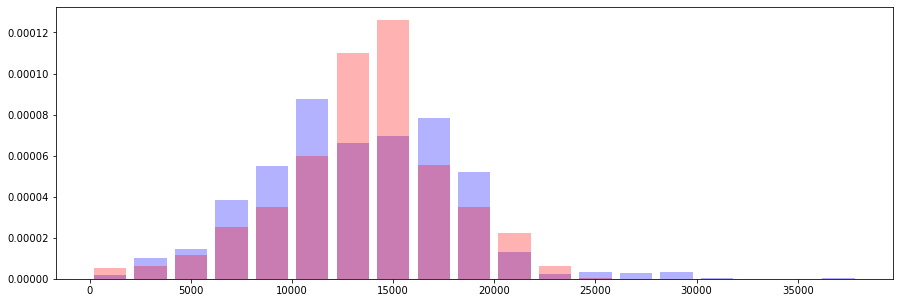

In [24]:
plt.figure(figsize=(15, 5))
M = y_ts.max()
plt.hist(y_ts, bins=np.linspace(0, M, 20), rwidth=.8, alpha=.3, color='b', density=True)
plt.hist(y_pred, bins=np.linspace(0, M, 20), rwidth=.8, alpha=.3, color='r', density=True);

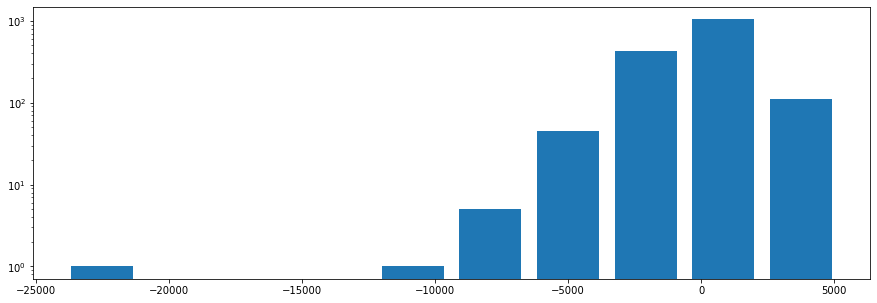

In [25]:
plt.figure(figsize=(15, 5))
plt.hist(y_pred-y_ts, bins=10, rwidth=.8, density=False, log=True);

### O modelo tende a prever valores de vendas menores que os preços reais. Isso provavelmente foi causado pelos outliers. Pode-se criar hipóteses sobre o porque disso estar acontecendo:
- Isso pode indicar que alguns vendedores conseguem vender os carros por preços maiores; 

ou 
- Alguns clientes estão dispostos a pagar um preço maior para garantir que consigam comprar o carro desejado.

# Interpretando

In [26]:
lr.intercept_

12885.705771087753

In [27]:
lr.coef_

array([ 2811.89045316, -1274.03816469,  2507.541809  ,  -933.53305405,
       -2148.06938226,  2434.23015831])

In [28]:
for col, coef in zip(X_tr.columns, lr.coef_):
    print(f'{col:40s} : {coef:7.3f}')

year                                     : 2811.890
mileage                                  : -1274.038
engineSize                               : 2507.542
transmission_Manual                      : -933.533
transmission_Semi-Auto                   : -2148.069
fuelType_Petrol                          : 2434.230


### Se uma variável apresenta um coeficiente negativo, quanto maior ela for, menor é o preço do carro.

## O intercepto dá o preço do carro 'padrão', isto é, se todas as variáveis forem nulas, o carro (com essas características) custará o valor do intercepto.

In [29]:
print( 'year', scalers['year'].mean_, scalers['year'].scale_)
print( 'mileage', scalers['mileage'].mean_, scalers['mileage'].scale_)
print( 'engineSize', scalers['engineSize'].mean_, scalers['engineSize'].scale_)

year [2017.13963846] [2.1576929]
mileage [22813.16505109] [20574.34346233]
engineSize [1.36101651] [0.39985564]


## As características "padrão" são:
### - year = 2017
### - mileage = 22813 miles
### - engineSize = 1.36
### - fuelType = Diesel
### - transmission = Automatic
## O carro custa 12886 dólares

In [30]:
for col, coef in zip(X_tr.columns, lr.coef_):
    print(f'{col:40s} : {coef:7.3f}')

year                                     : 2811.890
mileage                                  : -1274.038
engineSize                               : 2507.542
transmission_Manual                      : -933.533
transmission_Semi-Auto                   : -2148.069
fuelType_Petrol                          : 2434.230


### Isso significa que o modelo prevê:
- Cada 2.15 anos (Year), o valor do carro deprecia 2811 dólares;
- Cada 20574 milhas (Mileage), o valor do carro deprecia 1274 dólares;
- Cada 0.4 no tamanho do motor (engineSize), o valor do carro deprecia 2507 dólares;
- Carros manuais (Manual) são 934 dólares mais baratos que os carros automáticos (Automatic);
- Carros semi-automáticos (Semi-Auto) são 2148 dólares mais baratos que carros automáticos (Automatic);
- Carros que usam gasolina (Petrol) são 2434 dólares mais caros que veículos que utilizam Diesel.